# Elements of Data Science

# COMS W4995 007 2018 3


## Week 5: Classification and Regression

## Reading: 

PDHB Feature Engineering (pp375-382)

## Today

- Review
 - pandas apply
 - lambda functions

- Supervised Machine Learning

- Regression Methods
    - Simple Linear
    - Multivariate
    - Polynomial

- Classification Methods
    - k Nearest Neighbor
    - Logistic Regression
    - Naive Bayes
    - Trees and Forests
    - SVMs
    - Deep Networks

In [2]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

np.random.seed(123)
%matplotlib inline

# To suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

digits = datasets.load_digits()
boston = datasets.load_boston()
taxi = pd.read_csv('../data/yellow_tripdata_2017-01_subset10000rows.csv', index_col=0)
taxi_200 = taxi[(taxi.tip_amount > 0)&(taxi.trip_distance < 15)][:200]

In [51]:
flower = pd.read_csv('../data/week1_flowershop_data.csv')
flower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
lastname           1000 non-null object
purchase_date      1000 non-null object
stars              1000 non-null int64
price              978 non-null float64
favorite_flower    1000 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 39.1+ KB


In [61]:
f = lambda x: sum(x)

In [62]:
f([1,2,3])

6

In [64]:
# get the average number of stars by favorite flower
avg_stars = flower.groupby('favorite_flower').stars.apply(lambda x: sum(x) / len(x))
avg_stars.sort_values(ascending=False)

favorite_flower
lilac        4.011494
carnation    3.662921
jasmine      3.652174
iris         3.552632
orchid       3.540000
daffodil     3.521277
rose         3.438462
gerbera      3.436364
gardenia     3.415584
sunflower    3.255319
daisy        3.250000
tulip        3.191781
Name: stars, dtype: float64

## Prediction

#### Example: MNIST dataset

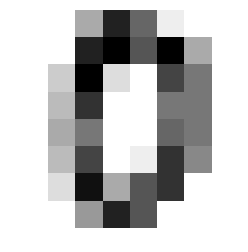

In [66]:
from sklearn import datasets
digits = datasets.load_digits()
_ = plt.imshow(digits['images'][0], cmap=matplotlib.cm.binary, interpolation='nearest')
_ = plt.axis('off')

In [67]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
digits['target'][0]

0

### Given a bunch of item, label pairs:

In [6]:
X = digits['data'][:100]
y = digits['target'][:100]

### Can we predict the label on a new item?

In [7]:
new_x = digits['data'][101]
new_x

array([ 0.,  0.,  1., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 16., 14.,
        3.,  0.,  0.,  0.,  2., 16., 14., 11., 13.,  0.,  0.,  0.,  2.,
       16., 10.,  0., 14.,  4.,  0.,  0.,  4., 16.,  0.,  0., 12.,  4.,
        0.,  0.,  4., 16.,  3.,  0., 11., 10.,  0.,  0.,  0., 13., 12.,
        8., 14.,  6.,  0.,  0.,  0.,  3., 10., 16., 12.,  1.,  0.])

## Supervised Machine Learning

### Definitions

- $x_i$ is an **observation** 
    - a row in our DataFrame
    - a vector of length *m*
    - aka item, data point, independent variable)

- $y_i$ is the **label** for observation $x_i$
    - the thing we want to predict
    - aka target, class, dependent variable

 - the **model** predicts $y_i$ from $x_i$
  - trained on set of $(x_i,y_i)_{i=1:n}$ pairs
  - training means learning **parameters**
  - might have **hyperparameters** to tune
  - $f : x \mapsto y$

- Is $y$ a real number ($y \in \mathbf{R}$)? 
    - **Regression**
    - e.g. temperature, stock price, heart rate
    

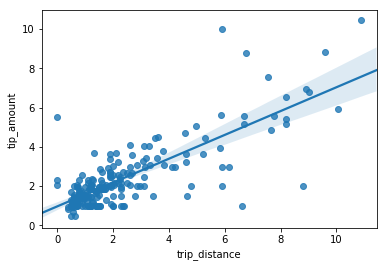

In [8]:
_ = sns.regplot(x='trip_distance',y='tip_amount',data=taxi_200)

- Is $y$ a category or class ($y \in \{c_1,c_2,\ldots\}$)? 
    - **Classification**
    - e.g. positive/negative, sunny/cloudy/rainy, yes/no loan default risk 

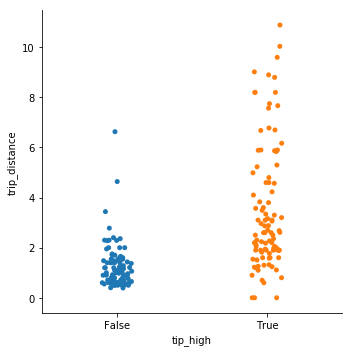

In [9]:
taxi_200['tip_high'] = taxi_200.tip_amount > taxi_200.tip_amount.median()
_ = sns.catplot(x='tip_high',y='trip_distance', data=taxi_200)

#### Other types of Machine Learning

- Unsupervised
    - Clustering
    - Dimensionality Reduction
    - etc...
    

- Reinforcement Learning
    - Pathfinding
    - Task Completion
    - etc...

## Training a model using sklearn

1. instantiate the model
2. fit
3. predict

## Regression Methods

 - Simple Linear Regression
 - Simple Polynomial Regression
 - Multivariate Regression

### Simple Linear Regression ($m = 1$)

$$\Large y = ax + b$$

$$\Large y_i = \beta_1 x_i + \beta_0$$

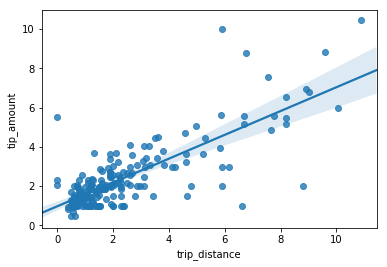

In [10]:
sns.regplot(x="trip_distance", y="tip_amount", data=taxi_200);

In [11]:
from sklearn.linear_model import LinearRegression 

regr = LinearRegression()

In [12]:
X = taxi_200['trip_distance'].values.reshape(-1,1)
y = taxi_200['tip_amount']

regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print('beta_0 = {:0.3f}'.format(regr.intercept_))

beta_0 = 0.968


In [14]:
print('beta_1 = {:0.3f}'.format(regr.coef_[0]))

beta_1 = 0.607


### Simple Polynomial Regression ($m=1$)

$$
\Large y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2
$$

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [16]:
poly = PolynomialFeatures(degree=2, include_bias=True)
poly.fit_transform(X[:3])

array([[1.    , 1.6   , 2.56  ],
       [1.    , 1.24  , 1.5376],
       [1.    , 1.4   , 1.96  ]])

$$
\Large y_i = \beta_0 x_{i,0} + \beta_1 x_{i,1} + \beta_2 x_{i,1}^2
$$

In [17]:
model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=True)),
                  ('linear', LinearRegression(fit_intercept=False))])

In [18]:
model = model.fit(X, y)

In [19]:
for i in range(3):
    print('beta_{:} = {:0.3}'.format(i,model.named_steps['linear'].coef_[i]))

beta_0 = 1.17
beta_1 = 0.434
beta_2 = 0.02


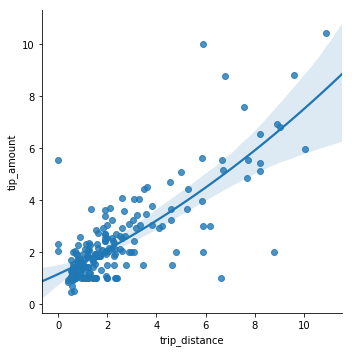

In [20]:
_ = sns.lmplot(x='trip_distance', y='tip_amount', data=taxi_200, order=2)

### Multivariate Linear Regression ($m > 1$)

$$\Large 
\begin{align}
y_i &= \beta_0 x_{i,0} + \beta_1 x_{i,1} + \beta_2 x_{i,2} + \ldots + \beta_m x_{i,m} \\
    & = \sum_{j = 0}^{m} \beta_{j}x_{i,j} \\
    & =  \beta x_i
\end{align}
$$

In [21]:
tips = sns.load_dataset("tips")
tips['x_0'] = 1
X = tips[['x_0','total_bill','size']].values
y = tips['tip']

In [22]:
regr = LinearRegression(fit_intercept=False)

In [23]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [24]:
for i in range(3):
    print('beta_{:} = {:0.3}'.format(i,regr.coef_[i]))

beta_0 = 0.669
beta_1 = 0.0927
beta_2 = 0.193


### Issue? : Are total_bill and size correlated?

In [25]:
from scipy.stats import pearsonr

pearsonr(tips['total_bill'], tips['size'])

(0.5983151309049014, 4.393510142477188e-25)

#### Can we de-correlate them?


In [26]:
tips['total_bill_per_person'] = tips['total_bill'] / tips['size']

In [27]:
pearsonr(tips['total_bill_per_person'], tips['size'])

(-0.17541201654288813, 0.006009064798959246)

In [28]:
X = tips[['x_0','total_bill_per_person','size']].values
regr.fit(X,y)
for i in range(3):
    print('beta_{:} = {:0.3}'.format(i,regr.coef_[i]))

beta_0 = -0.798
beta_1 = 0.212
beta_2 = 0.826


What does $\beta_0$ mean here? Does it make sense?

In [29]:
# Force intercept to zero
tips.x_0 = 0

X = tips[['x_0','total_bill_per_person','size']].values

regr.fit(X,y)
for i in range(3):
    print('beta_{:} = {:0.3}'.format(i,regr.coef_[i]))

beta_0 = 0.0
beta_1 = 0.164
beta_2 = 0.679


### Another Implementation: statsmodels

In [30]:
import statsmodels.api as sm

X = tips[['total_bill_per_person','size']].values

#X = sm.add_constant(X)

model = sm.OLS(y,X)
residuals = model.fit()
print(residuals.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1062.
Date:                Mon, 08 Oct 2018   Prob (F-statistic):          1.58e-120
Time:                        13:41:48   Log-Likelihood:                -359.48
No. Observations:                 244   AIC:                             723.0
Df Residuals:                     242   BIC:                             730.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1642      0.016     10.412      0.0

## Aside: Prediction Vs. Explanation

In [31]:
regr.fit(X,y)
for i in range(2):
    print('beta_{:} = {:0.3}'.format(i+1,regr.coef_[i]))

beta_1 = 0.164
beta_2 = 0.679


In [32]:
# get prediction for total_bill_per_person = 100, size = 1
regr.predict(np.array([100.00,1]).reshape(1, -1))

array([17.10385005])

## Classification

 - distance based
 - linear
 - tree based
 - network

### k Nearest Neighbor

> "What is the category of most of the $k$ nearest neighbors to $x_i$?"

1. Find k nearest neighbors
2. Take a (weighted?) majority vote

Need to define: 
- k
- what "close" means (***distance metric***)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/320px-KnnClassification.svg.png?1507219931759">

<img src="./images/sphx_glr_plot_classification_001.png">

> Q: What does the machine learn?

#### Pros and Cons of kNN

- fast to train
- potentially slow to predict
- need to deal with categorical variables

### Logistic Regression

> "If we use a squashing function on a linear regression, we can get a classification."

In [33]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [34]:
from sklearn.model_selection import train_test_split

X = diabetes.data[:,2].reshape(-1,1) # bmi
y = diabetes.target > np.median(diabetes.target) # progression

In [35]:
regr = LinearRegression()
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
y_pred = regr.predict(X)

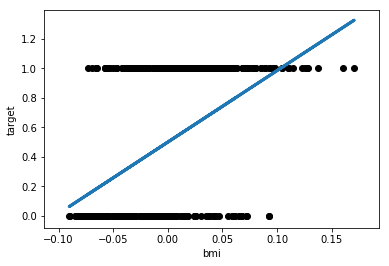

In [37]:
_ = plt.scatter(X,y, color='k')
_ = plt.plot(X,y_pred, linewidth=3)
_ = plt.xlabel('bmi')
_ = plt.ylabel('target')

- instead of real number, want {0,1}
- Use the "squashing" function $\sigma$

$$
\Large \sigma(\beta_1 x_i + \beta_0) = \frac{1}{1+e^{-\left(\beta_1 x_i + \beta_0\right)}}
$$

$$ 
\Large
y_i = 
\begin{cases}
1 &\text{if } \sigma (\beta_1 x_i + \beta_0) > 0.5, \\ 
0 &\text{o.w.}
\end{cases}
$$

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logreg = LogisticRegression()
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
logreg.fit(X,y)
y_pred = logreg.predict(X)

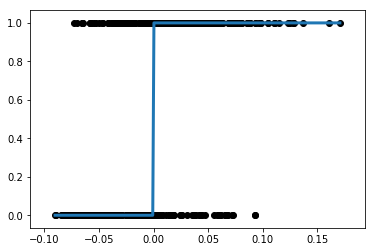

In [41]:
tmp = np.array(sorted(zip(X,y_pred), key=lambda x:x[0]))
_ = plt.scatter(X,y, color='k')
_ = plt.plot(tmp[:,0],tmp[:,1], linewidth=3)

In [42]:
logreg.coef_

array([[3.8803178]])

#### Pros and Cons of Logistic Regression
- interpretable
- sensitive to scaling of variables
- need to deal with categorical variables

### Naive Bayes

> "If we know ***how likely a class is***, and ***how likely the observation is given the class***, we can guess which class is the better fit"

#### Bayes rule

$$
\Large p(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}
$$

$$
\Large p(y_i = 1 \mid x_i) = \frac{P(x_i \mid y_i) P(y_i)}{P(x_i)}
$$

#### Naive Bayes Classifier
$$
\Large \hat{y}_i = \arg\max_{c \in {0,1,\ldots}} p(x_i \mid \hat{y}_i = c) p(\hat{y}_i = c)
$$

#### Pros and Cons of Naive Bayes
- simple
- depends on strong independence assumption
- data scarcity (when learning)
- need to deal with real values

### SVMs

> "Can we find the line/plane that separates our classes, with the largest margin."

<img src="http://docs.opencv.org/2.4/_images/separating-lines.png">

<img src="http://docs.opencv.org/2.4/_images/optimal-hyperplane.png">

#### Pros and Cons of SVM
- slow to learn
- fast to evaluate
- can use kernel trick to learn non-linear functions

### Trees and Forests

#### Decision Tree

> "If we ask a bunch of yes no questions, we can get to an answer."

<img src="./images/iris_decision_tree.svg">

In [43]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Pros and Cons of Decision Trees
- very interpretable
- tendency to overfit

### (Ensemble of Decision Trees) Random Forest and Gradient Boost

> "If we train a bunch of trees, the majority vote will give us an answer."

<img src="images/Architecture-of-the-random-forest-model.png">

#### Common Tree Ensembles

- Random Forest - variation with random selection of features

- Gradient Boost - variation due to changes in observation weight

In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

#### Pros and Cons of Random Forest and GradientBoost
- less interpretable
- longer to train, fast to evaluate
- performs well in the field

### Deep Learning, Convolutional Networks, Neural Nets, Deep Belief Networks,...

<img src="https://www.strong.io/blog-images/movie-posters/Slide6.png">

#### Pros and Cons of Deep Learning
- highly uninterpretable
- can learn complex interactions
- perform well on tasks involving complex signals (eg interactions of layered factors)

## Multiclass

 - One-Vs-Many
 - One-Vs-Rest

## Training, Testing and Generalization

### Train/Tune?/Test

In [46]:
from sklearn.model_selection import train_test_split

### Overfitting and Underfitting

- Overfitting: poor generalization due to complexity (polynomial regression example)

- Underfitting: poor generalization due to simplicity

### Regularization

## sklearn

- `model = SomeModel(arg1=value1, arg2=value2, etc..)`

- model.fit(X,y)

- model.predict(X)

- model.predict_proba(X), model.decision_function(X)

- model.transform(X)

- model.fit_transform(X)